In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import re

In [3]:
df=pd.read_csv('mobiles.csv')

In [4]:
df.isna().sum()

mobile_name        0
price              0
rating             0
specs_score      155
connectivity       0
processor          0
storage            0
battery            0
display            0
camera             0
extra_storage      3
os                11
dtype: int64

In [5]:
df.shape

(1020, 12)

In [6]:
df[df.duplicated()]

,mobile_name,price,rating,specs_score,connectivity,processor,storage,battery,display,camera,extra_storage,os
120,Lava Storm 5G,"₹13,499",4.65,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 6080, Octa Core, 2.4 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.78 inches, 2400 x 1200 px, 120 Hz Display wi...",50 MP + 8 MP Dual Rear & 16 MP Front Camera,"Memory Card Supported, upto 1 TB",Android v13


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1019 entries, 0 to 1019
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mobile_name    1019 non-null   object 
 1   price          1019 non-null   object 
 2   rating         1019 non-null   float64
 3   specs_score    864 non-null    float64
 4   connectivity   1019 non-null   object 
 5   processor      1019 non-null   object 
 6   storage        1019 non-null   object 
 7   battery        1019 non-null   object 
 8   display        1019 non-null   object 
 9   camera         1019 non-null   object 
 10  extra_storage  1016 non-null   object 
 11  os             1008 non-null   object 
dtypes: float64(2), object(10)
memory usage: 103.5+ KB


In [9]:
df.drop(columns='os',inplace=True)

In [10]:
df['brand'] = df['mobile_name'].str.split(' ', n=1, expand=True)[0]
df

,mobile_name,price,rating,specs_score,connectivity,processor,storage,battery,display,camera,extra_storage,brand
0,OPPO Reno 11,"₹29,990",4.70,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8200, Octa Core, 3.1 GHz Processor","8 GB RAM, 256 GB inbuilt",4800 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 32 MP + 8 MP Triple Rear & 32 MP Front...,Android v14,OPPO
1,Poco X6 Pro 5G,"₹19,999",4.50,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8300 Ultra, Octa Core, 3.35 GHz Proc...","12 GB RAM, 256 GB inbuilt",5500 mAh Battery with 90W Fast Charging,"6.67 inches, 1220 x 2712 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v14,Poco
2,Xiaomi Redmi Note 13 Pro Plus,"₹31,999",4.35,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 7200 Ultra, Octa Core, 2.8 GHz Proce...","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 120W Fast Charging,"6.67 inches, 1220 x 2712 px, 120 Hz Display wi...",200 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Xiaomi
3,OPPO Reno 11 Pro,"₹40,990",4.75,88.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8200, Octa Core, 3.1 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 80W Fast Charging,"6.74 inches, 1240 x 2772 px, 120 Hz Display wi...",50 MP + 32 MP + 8 MP Triple Rear & 32 MP Front...,Android v14,OPPO
4,Xiaomi Redmi Note 13 Pro Max 5G,"₹33,999",4.00,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 7 Gen1, Octa Core, 2.4 GHz Processor","12 GB RAM, 256 GB inbuilt",5200 mAh Battery with 120W Fast Charging,"6.67 inches, 1220 x 2712 px, 144 Hz Display wi...",200 MP + 13 MP + 8 MP Triple Rear & 32 MP Fron...,Memory Card Not Supported,Xiaomi
...,...,...,...,...,...,...,...,...,...,...,...,...
1015,POCO M3 Pro 5G,"₹12,390",4.50,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Dimensity 700 5G, Octa Core, 2.2 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 18W Fast Charging,"6.5 inches, 1080 x 2400 px, 90 Hz Display with...",48 MP + 2 MP + 2 MP Triple Rear & 8 MP Front C...,"Memory Card (Hybrid), upto 1 TB",POCO
1016,Asus ROG Phone 6,"₹71,999",4.70,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",6000 mAh Battery with 65W Fast Charging,"6.78 inches, 1080 x 2448 px, 165 Hz Display",50 MP + 13 MP + 5 MP Triple Rear & 12 MP Front...,Memory Card Not Supported,Asus
1017,iQOO 7 (8GB RAM + 256GB),"₹25,499",4.05,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 870, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",4400 mAh Battery with 66W Fast Charging,"6.62 inches, 1080 x 2400 px, 120 Hz Display wi...",48 MP + 13 MP + 2 MP Triple Rear & 16 MP Front...,Android v11,iQOO
1018,Realme X7 Max,"₹23,999",4.55,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 1200, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 50W Fast Charging,"6.43 inches, 1080 x 2400 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v11,Realme


In [11]:
df.drop(columns=['mobile_name'],inplace=True)

In [12]:
df

,price,rating,specs_score,connectivity,processor,storage,battery,display,camera,extra_storage,brand
0,"₹29,990",4.70,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8200, Octa Core, 3.1 GHz Processor","8 GB RAM, 256 GB inbuilt",4800 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 32 MP + 8 MP Triple Rear & 32 MP Front...,Android v14,OPPO
1,"₹19,999",4.50,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8300 Ultra, Octa Core, 3.35 GHz Proc...","12 GB RAM, 256 GB inbuilt",5500 mAh Battery with 90W Fast Charging,"6.67 inches, 1220 x 2712 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v14,Poco
2,"₹31,999",4.35,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 7200 Ultra, Octa Core, 2.8 GHz Proce...","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 120W Fast Charging,"6.67 inches, 1220 x 2712 px, 120 Hz Display wi...",200 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Xiaomi
3,"₹40,990",4.75,88.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8200, Octa Core, 3.1 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 80W Fast Charging,"6.74 inches, 1240 x 2772 px, 120 Hz Display wi...",50 MP + 32 MP + 8 MP Triple Rear & 32 MP Front...,Android v14,OPPO
4,"₹33,999",4.00,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 7 Gen1, Octa Core, 2.4 GHz Processor","12 GB RAM, 256 GB inbuilt",5200 mAh Battery with 120W Fast Charging,"6.67 inches, 1220 x 2712 px, 144 Hz Display wi...",200 MP + 13 MP + 8 MP Triple Rear & 32 MP Fron...,Memory Card Not Supported,Xiaomi
...,...,...,...,...,...,...,...,...,...,...,...
1015,"₹12,390",4.50,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Dimensity 700 5G, Octa Core, 2.2 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 18W Fast Charging,"6.5 inches, 1080 x 2400 px, 90 Hz Display with...",48 MP + 2 MP + 2 MP Triple Rear & 8 MP Front C...,"Memory Card (Hybrid), upto 1 TB",POCO
1016,"₹71,999",4.70,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",6000 mAh Battery with 65W Fast Charging,"6.78 inches, 1080 x 2448 px, 165 Hz Display",50 MP + 13 MP + 5 MP Triple Rear & 12 MP Front...,Memory Card Not Supported,Asus
1017,"₹25,499",4.05,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 870, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",4400 mAh Battery with 66W Fast Charging,"6.62 inches, 1080 x 2400 px, 120 Hz Display wi...",48 MP + 13 MP + 2 MP Triple Rear & 16 MP Front...,Android v11,iQOO
1018,"₹23,999",4.55,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 1200, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 50W Fast Charging,"6.43 inches, 1080 x 2400 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v11,Realme


In [13]:
df.set_index('brand',inplace=True)

In [14]:
df.columns

Index(['price', 'rating', 'specs_score', 'connectivity', 'processor',
       'storage', 'battery', 'display', 'camera', 'extra_storage'],
      dtype='object')

In [15]:
df.drop(columns=['extra_storage'],inplace=True)

In [16]:
df.sort_values(by='brand',inplace=True)


In [17]:
df

,price,rating,specs_score,connectivity,processor,storage,battery,display,camera
brand,,,,,,,,,
Apple,"₹1,59,900",4.20,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A18 Pro, Hexa Core Processor","8 GB RAM, 128 GB inbuilt",4200 mAh Battery with Fast Charging,"6.7 inches, 1800 x 3200 px, 120 Hz Display wit...",48 MP + 48 MP + 12 MP Triple Rear & 12 MP Fron...
Apple,"₹99,990",4.55,88.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A16, Hexa Core, 3.46 GHz Processor","8 GB RAM, 128 GB inbuilt",4352 mAh Battery with 25W Fast Charging,"6.68 inches, 1284 x 2778 px Display with Punch...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...
Apple,"₹59,999",4.65,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor","6 GB RAM, 128 GB inbuilt",3279 mAh Battery with Fast Charging,"6.1 inches, 1170 x 2532 px Display with Small ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera
Apple,"₹1,40,990",4.45,88.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A17 Pro, Hexa Core, 3.78 GHz Processor","8 GB RAM, 256 GB inbuilt",3274 mAh Battery with Fast Charging,"6.1 inches, 1179 x 2556 px, 120 Hz Display wit...",48 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...
Apple,"₹1,49,900",4.50,79.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A17, Octa Core Processor","8 GB RAM, 128 GB inbuilt",4700 mAh Battery with Fast Charging,"6.73 inches, 1290 x 2796 px, 120 Hz Display",48 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...
...,...,...,...,...,...,...,...,...,...
itel,"₹9,999",4.00,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 6080, Octa Core, 2.4 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 18W Fast Charging,"6.6 inches, 1600 x 720 px, 90 Hz Display with ...",50 MP Dual Rear & 8 MP Front Camera
itel,"₹1,462",4.45,NaN,Dual Sim,"32 MB RAM, 32 MB inbuilt",1900 mAh Battery,"2.8 inches, 320 x 240 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"
itel,"₹6,999",4.25,70.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Octa Core, 1.6 GHz Processor","4 GB RAM, 128 GB inbuilt",5000 mAh Battery with 10W Fast Charging,"6.6 inches, 1600 x 720 px, 90 Hz Display with ...",50 MP + 0.08 MP Dual Rear & 8 MP Front Camera


In [18]:
df

,price,rating,specs_score,connectivity,processor,storage,battery,display,camera
brand,,,,,,,,,
Apple,"₹1,59,900",4.20,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A18 Pro, Hexa Core Processor","8 GB RAM, 128 GB inbuilt",4200 mAh Battery with Fast Charging,"6.7 inches, 1800 x 3200 px, 120 Hz Display wit...",48 MP + 48 MP + 12 MP Triple Rear & 12 MP Fron...
Apple,"₹99,990",4.55,88.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A16, Hexa Core, 3.46 GHz Processor","8 GB RAM, 128 GB inbuilt",4352 mAh Battery with 25W Fast Charging,"6.68 inches, 1284 x 2778 px Display with Punch...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...
Apple,"₹59,999",4.65,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor","6 GB RAM, 128 GB inbuilt",3279 mAh Battery with Fast Charging,"6.1 inches, 1170 x 2532 px Display with Small ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera
Apple,"₹1,40,990",4.45,88.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A17 Pro, Hexa Core, 3.78 GHz Processor","8 GB RAM, 256 GB inbuilt",3274 mAh Battery with Fast Charging,"6.1 inches, 1179 x 2556 px, 120 Hz Display wit...",48 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...
Apple,"₹1,49,900",4.50,79.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A17, Octa Core Processor","8 GB RAM, 128 GB inbuilt",4700 mAh Battery with Fast Charging,"6.73 inches, 1290 x 2796 px, 120 Hz Display",48 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...
...,...,...,...,...,...,...,...,...,...
itel,"₹9,999",4.00,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 6080, Octa Core, 2.4 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 18W Fast Charging,"6.6 inches, 1600 x 720 px, 90 Hz Display with ...",50 MP Dual Rear & 8 MP Front Camera
itel,"₹1,462",4.45,NaN,Dual Sim,"32 MB RAM, 32 MB inbuilt",1900 mAh Battery,"2.8 inches, 320 x 240 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"
itel,"₹6,999",4.25,70.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Octa Core, 1.6 GHz Processor","4 GB RAM, 128 GB inbuilt",5000 mAh Battery with 10W Fast Charging,"6.6 inches, 1600 x 720 px, 90 Hz Display with ...",50 MP + 0.08 MP Dual Rear & 8 MP Front Camera


In [19]:
df['specs_score'] = df.groupby('brand')['specs_score'].transform(lambda x: x.fillna(x.mean()))


In [20]:
df

,price,rating,specs_score,connectivity,processor,storage,battery,display,camera
brand,,,,,,,,,
Apple,"₹1,59,900",4.20,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A18 Pro, Hexa Core Processor","8 GB RAM, 128 GB inbuilt",4200 mAh Battery with Fast Charging,"6.7 inches, 1800 x 3200 px, 120 Hz Display wit...",48 MP + 48 MP + 12 MP Triple Rear & 12 MP Fron...
Apple,"₹99,990",4.55,88.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A16, Hexa Core, 3.46 GHz Processor","8 GB RAM, 128 GB inbuilt",4352 mAh Battery with 25W Fast Charging,"6.68 inches, 1284 x 2778 px Display with Punch...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...
Apple,"₹59,999",4.65,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor","6 GB RAM, 128 GB inbuilt",3279 mAh Battery with Fast Charging,"6.1 inches, 1170 x 2532 px Display with Small ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera
Apple,"₹1,40,990",4.45,88.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A17 Pro, Hexa Core, 3.78 GHz Processor","8 GB RAM, 256 GB inbuilt",3274 mAh Battery with Fast Charging,"6.1 inches, 1179 x 2556 px, 120 Hz Display wit...",48 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...
Apple,"₹1,49,900",4.50,79.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A17, Octa Core Processor","8 GB RAM, 128 GB inbuilt",4700 mAh Battery with Fast Charging,"6.73 inches, 1290 x 2796 px, 120 Hz Display",48 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...
...,...,...,...,...,...,...,...,...,...
itel,"₹9,999",4.00,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 6080, Octa Core, 2.4 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 18W Fast Charging,"6.6 inches, 1600 x 720 px, 90 Hz Display with ...",50 MP Dual Rear & 8 MP Front Camera
itel,"₹1,462",4.45,70.0,Dual Sim,"32 MB RAM, 32 MB inbuilt",1900 mAh Battery,"2.8 inches, 320 x 240 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"
itel,"₹6,999",4.25,70.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Octa Core, 1.6 GHz Processor","4 GB RAM, 128 GB inbuilt",5000 mAh Battery with 10W Fast Charging,"6.6 inches, 1600 x 720 px, 90 Hz Display with ...",50 MP + 0.08 MP Dual Rear & 8 MP Front Camera


In [21]:
df

,price,rating,specs_score,connectivity,processor,storage,battery,display,camera
brand,,,,,,,,,
Apple,"₹1,59,900",4.20,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A18 Pro, Hexa Core Processor","8 GB RAM, 128 GB inbuilt",4200 mAh Battery with Fast Charging,"6.7 inches, 1800 x 3200 px, 120 Hz Display wit...",48 MP + 48 MP + 12 MP Triple Rear & 12 MP Fron...
Apple,"₹99,990",4.55,88.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A16, Hexa Core, 3.46 GHz Processor","8 GB RAM, 128 GB inbuilt",4352 mAh Battery with 25W Fast Charging,"6.68 inches, 1284 x 2778 px Display with Punch...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...
Apple,"₹59,999",4.65,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor","6 GB RAM, 128 GB inbuilt",3279 mAh Battery with Fast Charging,"6.1 inches, 1170 x 2532 px Display with Small ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera
Apple,"₹1,40,990",4.45,88.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A17 Pro, Hexa Core, 3.78 GHz Processor","8 GB RAM, 256 GB inbuilt",3274 mAh Battery with Fast Charging,"6.1 inches, 1179 x 2556 px, 120 Hz Display wit...",48 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...
Apple,"₹1,49,900",4.50,79.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A17, Octa Core Processor","8 GB RAM, 128 GB inbuilt",4700 mAh Battery with Fast Charging,"6.73 inches, 1290 x 2796 px, 120 Hz Display",48 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...
...,...,...,...,...,...,...,...,...,...
itel,"₹9,999",4.00,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 6080, Octa Core, 2.4 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 18W Fast Charging,"6.6 inches, 1600 x 720 px, 90 Hz Display with ...",50 MP Dual Rear & 8 MP Front Camera
itel,"₹1,462",4.45,70.0,Dual Sim,"32 MB RAM, 32 MB inbuilt",1900 mAh Battery,"2.8 inches, 320 x 240 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"
itel,"₹6,999",4.25,70.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Octa Core, 1.6 GHz Processor","4 GB RAM, 128 GB inbuilt",5000 mAh Battery with 10W Fast Charging,"6.6 inches, 1600 x 720 px, 90 Hz Display with ...",50 MP + 0.08 MP Dual Rear & 8 MP Front Camera


In [22]:
df2=df.sort_values(by=['brand', 'price'])

In [23]:
df2


,price,rating,specs_score,connectivity,processor,storage,battery,display,camera
brand,,,,,,,,,
Apple,"₹1,02,999",4.25,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A16, Hexa Core, 3.46 GHz Processor","6 GB RAM, 512 GB inbuilt",3349 mAh Battery with Fast Charging,"6.1 inches, 1179 x 2556 px Display with Dynami...",48 MP + 12 MP Dual Rear & 12 MP Front Camera
Apple,"₹1,09,900",4.30,77.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC","A13 Bionic, Hexa Core, 2.65 GHz Processor","4 GB RAM, 64 GB inbuilt",3500 mAh Battery with 18W Fast Charging,"6.5 inches, 1242 x 2688 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...
Apple,"₹1,12,999",4.70,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A16, Hexa Core, 3.46 GHz Processor","6 GB RAM, 512 GB inbuilt",4383 mAh Battery with Fast Charging,"6.7 inches, 1290 x 2796 px Display with Dynami...",48 MP + 12 MP Dual Rear & 12 MP Front Camera
Apple,"₹1,30,990",4.15,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A17 Pro, Hexa Core, 3.78 GHz Processor","8 GB RAM, 128 GB inbuilt",3274 mAh Battery with Fast Charging,"6.1 inches, 1179 x 2556 px, 120 Hz Display wit...",48 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...
Apple,"₹1,37,900",4.25,78.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A18 Pro, Hexa Core Processor","8 GB RAM, 128 GB inbuilt",3334 mAh Battery with Fast Charging,"6.12 inches, 1200 x 2666 px, 120 Hz Display wi...",48 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...
...,...,...,...,...,...,...,...,...,...
itel,"₹6,999",4.25,70.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Octa Core, 1.6 GHz Processor","4 GB RAM, 128 GB inbuilt",5000 mAh Battery with 10W Fast Charging,"6.6 inches, 1600 x 720 px, 90 Hz Display with ...",50 MP + 0.08 MP Dual Rear & 8 MP Front Camera
itel,"₹7,299",4.60,61.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Unisoc T603, Octa Core Processor","4 GB RAM, 256 GB inbuilt",5000 mAh Battery with 10W Fast Charging,"6.6 inches, 720 x 1612 px Display with Water D...",13 MP Dual Rear & 8 MP Front Camera
itel,"₹7,999",4.05,75.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Octa Core, 1.6 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 10W Fast Charging,"6.6 inches, 1600 x 720 px, 90 Hz Display with ...",50 MP + 0.08 MP Dual Rear & 8 MP Front Camera


In [24]:
avg_specs_by_brand = df.groupby('brand')['specs_score'].mean().reset_index()


/var/folders/zp/n6ct9bzs28q19545cxvx7zv00000gn/T/ipykernel_17501/970190075.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='brand', y='specs_score', data=avg_specs_by_brand, palette='viridis')
/Users/abhasjaiswal/Desktop/Python/myenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/abhasjaiswal/Desktop/Python/myenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_d

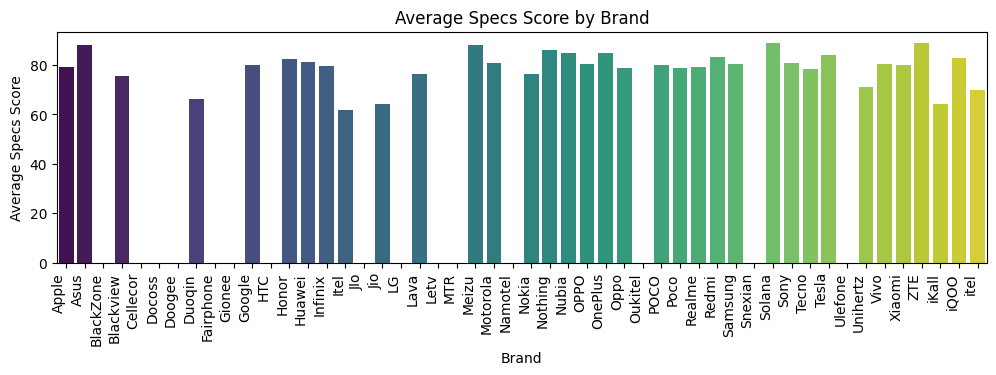

In [25]:
plt.figure(figsize=(12, 3))
sns.barplot(x='brand', y='specs_score', data=avg_specs_by_brand, palette='viridis')
plt.title('Average Specs Score by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Specs Score')
plt.xticks(rotation=90, ha='right')
plt.show()

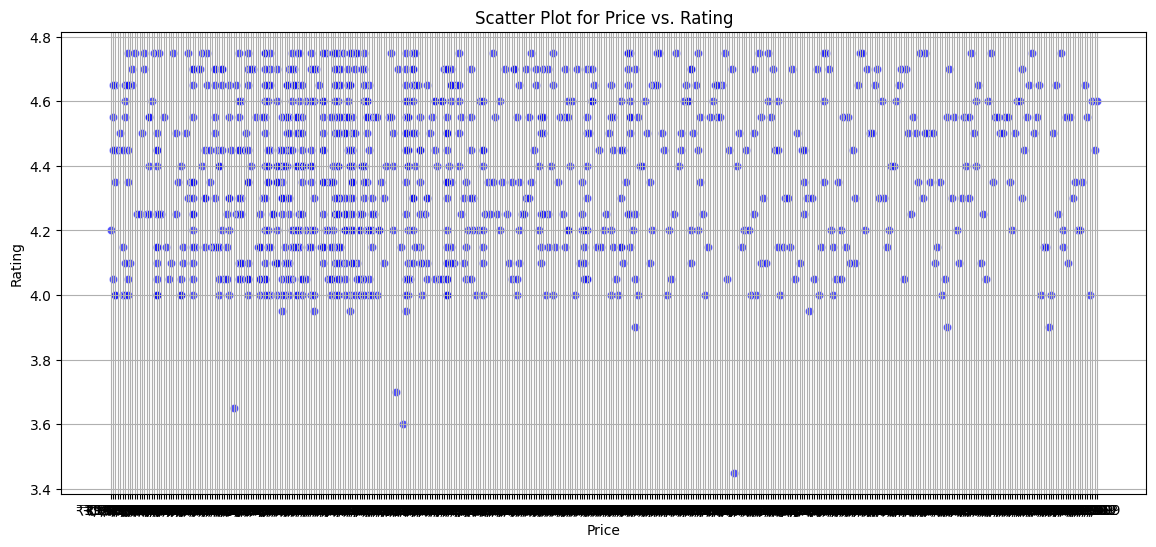

In [26]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='price', y='rating', data=df, color='blue', alpha=0.7)
plt.title('Scatter Plot for Price vs. Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

In [27]:
df['price'] = df['price'].replace('[\₹,]', '', regex=True).astype(float)


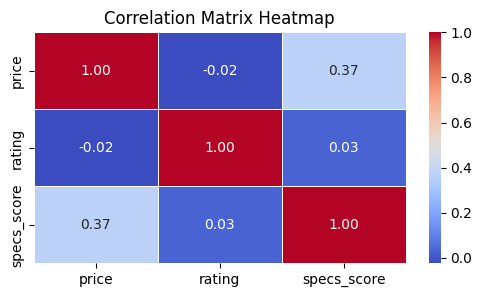

In [28]:
numerical_columns = ['price', 'rating', 'specs_score'] 

correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [29]:
df

,price,rating,specs_score,connectivity,processor,storage,battery,display,camera
brand,,,,,,,,,
Apple,159900.0,4.20,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A18 Pro, Hexa Core Processor","8 GB RAM, 128 GB inbuilt",4200 mAh Battery with Fast Charging,"6.7 inches, 1800 x 3200 px, 120 Hz Display wit...",48 MP + 48 MP + 12 MP Triple Rear & 12 MP Fron...
Apple,99990.0,4.55,88.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A16, Hexa Core, 3.46 GHz Processor","8 GB RAM, 128 GB inbuilt",4352 mAh Battery with 25W Fast Charging,"6.68 inches, 1284 x 2778 px Display with Punch...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...
Apple,59999.0,4.65,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor","6 GB RAM, 128 GB inbuilt",3279 mAh Battery with Fast Charging,"6.1 inches, 1170 x 2532 px Display with Small ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera
Apple,140990.0,4.45,88.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A17 Pro, Hexa Core, 3.78 GHz Processor","8 GB RAM, 256 GB inbuilt",3274 mAh Battery with Fast Charging,"6.1 inches, 1179 x 2556 px, 120 Hz Display wit...",48 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...
Apple,149900.0,4.50,79.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A17, Octa Core Processor","8 GB RAM, 128 GB inbuilt",4700 mAh Battery with Fast Charging,"6.73 inches, 1290 x 2796 px, 120 Hz Display",48 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...
...,...,...,...,...,...,...,...,...,...
itel,9999.0,4.00,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 6080, Octa Core, 2.4 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 18W Fast Charging,"6.6 inches, 1600 x 720 px, 90 Hz Display with ...",50 MP Dual Rear & 8 MP Front Camera
itel,1462.0,4.45,70.0,Dual Sim,"32 MB RAM, 32 MB inbuilt",1900 mAh Battery,"2.8 inches, 320 x 240 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"
itel,6999.0,4.25,70.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Octa Core, 1.6 GHz Processor","4 GB RAM, 128 GB inbuilt",5000 mAh Battery with 10W Fast Charging,"6.6 inches, 1600 x 720 px, 90 Hz Display with ...",50 MP + 0.08 MP Dual Rear & 8 MP Front Camera


In [30]:
df.isnull().sum()

price            0
rating           0
specs_score     18
connectivity     0
processor        0
storage          0
battery          0
display          0
camera           0
dtype: int64

In [31]:
unique_processors = df['processor'].unique()
for processor in unique_processors:
    print(processor)
    

Bionic A18 Pro, Hexa Core Processor
Bionic  A16, Hexa Core, 3.46 GHz Processor
Bionic A15, Hexa Core, 3.22 GHz Processor
Bionic  A17 Pro, Hexa Core, 3.78 GHz Processor
Bionic  A17, Octa Core Processor
Apple  A13
A13 Bionic, Hexa Core, 2.65 GHz Processor
Bionic  A18 Pro, Hexa Core Processor
Bionic A14, Hexa Core, 3.1 GHz Processor
Bionic  A19, Deca Core Processor
Bionic A17, Octa Core Processor
Bionic A18, Octa Core Processor
Bionic A16
32 GB inbuilt
Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor
Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor
Snapdragon 8 Gen3, Octa Core, 3.3 GHz Processor
Snapdragon  888+, Octa Core, 2.9 GHz Processor
Quad Core, 1 GHz Processor
Helio G35, Octa Core, 2.3 GHz Processor
Helio G99, Octa Core, 2.2 GHz Processor
100 kHz Processor
Quad Core, 1.2 GHz Processor
Dimensity 7050, Octa Core, 2.6 GHz Processor
Helio  G85, Octa Core, 2 GHz Processor
Snapdragon QCM6490, Octa Core, 2.7 GHz Processor
Tiger  T310, Quad Core, 2 GHz Processor
Tensor G3, Nine Core, 3 GHz

In [32]:
sorted_processors=sorted(unique_processors)
sorted_processors

['1.5\u2009MHz Processor',
 '10000\u2009mAh Battery with 10W Fast Charging',
 '100\u2009kHz Processor',
 '1\u2009GB RAM, 4\u2009GB inbuilt',
 '1\u2009GHz Processor',
 '1\u2009MHz Processor',
 '32\u2009GB inbuilt',
 '32\u2009MB RAM, 24\u2009MB inbuilt',
 '32\u2009MB RAM, 32\u2009GB inbuilt',
 '32\u2009MB RAM, 32\u2009MB inbuilt',
 '4\u2009MB RAM, 4\u2009MB inbuilt',
 '512\u2009MB RAM, 4\u2009GB inbuilt',
 'A13 Bionic, Hexa Core, 2.65\u2009GHz Processor',
 'Apple  A13',
 'Bionic  A16, Hexa Core, 3.46\u2009GHz Processor',
 'Bionic  A17 Pro, Hexa Core, 3.78\u2009GHz Processor',
 'Bionic  A17, Octa Core Processor',
 'Bionic  A18 Pro, Hexa Core Processor',
 'Bionic  A19, Deca Core Processor',
 'Bionic A14, Hexa Core, 3.1\u2009GHz Processor',
 'Bionic A15, Hexa Core, 3.22\u2009GHz Processor',
 'Bionic A16',
 'Bionic A17, Octa Core Processor',
 'Bionic A18 Pro, Hexa Core Processor',
 'Bionic A18, Octa Core Processor',
 'Dimensity  1200 Max, Octa Core, 3\u2009GHz Processor',
 'Dimensity  1300, 

In [33]:
processor_column = df['processor']
pattern = r'(\b\w+\s*\d*\b)'
df['Processor_Name'] = processor_column.str.extract(pattern, flags=re.IGNORECASE)
df['Processor_Name']

brand
Apple           Bionic 
Apple          Bionic  
Apple           Bionic 
Apple          Bionic  
Apple          Bionic  
              ...      
itel     Dimensity 6080
itel                32 
itel              Octa 
itel            Unisoc 
itel                 1 
Name: Processor_Name, Length: 1019, dtype: object

In [34]:
for brand,processorname in df['Processor_Name']:
     print(brand)
     print(processorname)

ValueError: too many values to unpack (expected 2)

In [ ]:
df['Brand'] = df['processor'].str.extract(r'([A-Za-z0-9]+)\s')


In [ ]:
df['Brand'].unique()

array(['Bionic', 'A13', '32', 'Apple', 'Snapdragon', 'Quad', 'Helio',
       '100', 'Dimensity', 'Tiger', 'Tensor', 'Google', 'Kirin', 'Octa',
       'Spreadtrum', 'Unisoc', '1', '312', '10000', '512', 'No', 'Dual',
       '5', '4', 'Exynos', 'Samsung'], dtype=object)

In [ ]:
for brand,type in df['Brand']:
     print(brand)
     print(type)
     

ValueError: too many values to unpack (expected 2)